In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

All parameters used in open-Qmin are set in (GH1). All base code used to compile and run open-Qmin are unchanged except for certain attributes as follows:

IN: setInitialConditions.h: 
        
        //choose a specific director and S0 value, and set all Q tensors to it
if(initializationSwitch ==2)
    {
    if(verbose) printf("initializing with speicific uniform texture\n");
    scalar s0 = S0;
    scalar3 targetDirector;
    targetDirector.x = 0;
    targetDirector.y = 0.17;
    targetDirector.z = 1;
    normalizeDirector(targetDirector);

    Configuration->setUniformDirectors(targetDirector,s0);
    };

IN: openQmin.cpp

#include "addObjectsToOpenQmin.h"

    scalar targetNematicValue = S0;
    scalar anchoringStrength1 = 12.919; /*This is The NON_DIM value for homeotropic anchoring*/
    boundaryObject homeotropicBoundary1(boundaryType::homeotropic,anchoringStrength1,targetNematicValue);
    sim->createWall(2,0,homeotropicBoundary1);

Now to run openQmin from the command line you would enter: 

-i (iterations needed) --LX 240 --Ly 240 --Lz 28 --deltaT 0.001 -z 2 --hFieldY (field in ND) --saveFile (filename)

In [2]:
def director_qmin_color(string, dimx, dimy, dimz):
    data = np.loadtxt(string, delimiter='	', converters=None, skiprows=0, usecols = (3,4,5,6,7))
    Qxx = data[:,0]
    Qxy = data[:,1]
    Qxz = data[:,2]
    Qyy = data[:,3]
    Qyz = data[:,4]
    Qmat = np.moveaxis(np.array([
                [Qxx, Qxy, Qxz],
                [Qxy, Qyy, Qyz],
                [Qxz, Qyz, -Qxx-Qyy]
                ]), -1, 0)
    evals, evecs = np.linalg.eigh(Qmat)
    n = (evecs[:,:,2])
    
    nx = n[:,0]
    ny = n[:,1]
    nz = n[:,2]
    
    
    color_ny_nx = np.absolute(np.arctan(ny/nx))
    color_nz_ny = np.absolute(np.arctan(nz/ny))

    color_ny_nx = np.reshape(color_ny_nx, (dimx,dimy,dimz), order='F')
    color_nz_ny = np.reshape(color_nz_ny, (dimx,dimy,dimz), order='F')
    nx = np.reshape(nx, (dimx,dimy,dimz), order='F')
    ny = np.reshape(ny, (dimx,dimy,dimz), order='F')
    nz = np.reshape(nz, (dimx,dimy,dimz), order='F')
    return(nx,ny,nz,color_ny_nx,color_nz_ny)

In [3]:
def remove_ticks_and_labels(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [4]:
dimx = 240
dimy = 240
dimz = 28

In [5]:
l = 40
w = 40
h = 20

mid_x = mid_y = 120
mid_z = 14

In [6]:
init_string = st = 'data_open_Qmin/f_trans/f_trans_240_240_28_H_'

st_end = '_x0y0z0.txt'

#define file path for data
g0 = H_0 = st + '0' + st_end

In [7]:
H_0_nx, H_0_ny, H_0_nz, H_0_c_ny_nx, H_0_c_nz_ny = director_qmin_color(g0,dimx,dimy,dimz)

/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_22981/2280039487.py:21: RuntimeWarning: divide by zero encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_22981/2280039487.py:21: RuntimeWarning: invalid value encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_22981/2280039487.py:22: RuntimeWarning: divide by zero encountered in divide
  color_nz_ny = np.absolute(np.arctan(nz/ny))


In [8]:
k_x_y = 8
scale = 40
width = .008
headaxislength = 0
headlength = 0
headwidth = .1

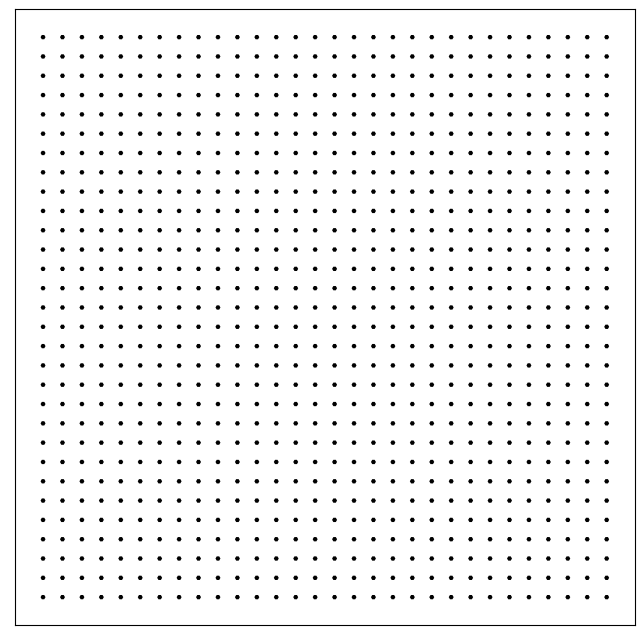

In [9]:
plt.figure(figsize=(8,8))

x, y = np.meshgrid(np.arange(H_0_ny.shape[1]), np.arange(H_0_ny.shape[0]))
sc = plt.quiver(x[::k_x_y, ::k_x_y], y[::k_x_y, ::k_x_y], H_0_ny[::k_x_y, ::k_x_y, mid_z], H_0_nx[::k_x_y, ::k_x_y, mid_z], pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth, linewidths=width)

remove_ticks_and_labels(plt.gca())


plt.show()

In [10]:
k_z = 4
scale = 80
width = .003
headaxislength = 0
headlength = 0
headwidth = 0

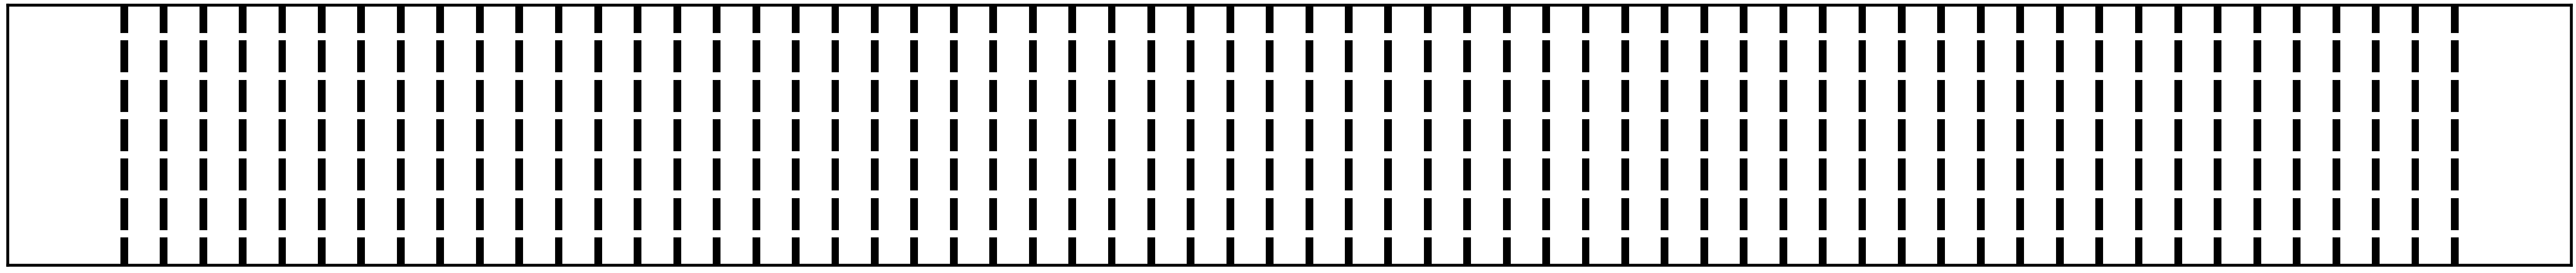

In [12]:
plt.figure(figsize=(64,64))

z_indices, y_indices = np.meshgrid(np.arange(0, H_0_ny.shape[2], k_z), np.arange(0, H_0_ny.shape[1], k_z), indexing='ij')

y_flat = y_indices.flatten()
z_flat = z_indices.flatten()

sc = plt.quiver(y_flat, z_flat, H_0_ny[mid_x, ::k_z, ::k_z].T.flatten(), H_0_nz[mid_x, ::k_z, ::k_z].T.flatten(), pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth)

remove_ticks_and_labels(plt.gca())

ax = plt.gca()
ax.set_aspect('equal',adjustable = 'box')

n = 4

plt.gca().spines['top'].set_linewidth(n)  # Top spine
plt.gca().spines['right'].set_linewidth(n)  # Right spine
plt.gca().spines['bottom'].set_linewidth(n)  # Bottom spine
plt.gca().spines['left'].set_linewidth(n)  # Left spine

plt.show()